# Loengu tagasiside analüüs

See fail on mõeldud loengu tagasiside analüüsimiseks, täpsemalt parima esineja leidmiseks

In [2]:
import pandas as pd
import numpy as np


In [21]:
esinejad = [["Esineja 1"],
            ["Esineja 2", "Esineja 3"]]

# Siia kogume kokku kõik esinejad ning nende keskmise hinde esinemisele
esinejate_keskmised = []

loengu_nr = 1
for loeng in esinejad:
    if len(loeng) == 1:
        esineja = loeng[0]
        tagasiside = pd.read_csv("loeng_" + str(loengu_nr) + "_tagasiside.csv")
        hinded = tagasiside[["Kuidas hindad esineja üldist esinemisoskust?"]]
        keskmine = hinded["Kuidas hindad esineja üldist esinemisoskust?"].mean()
        tulemus = [esineja, keskmine]
        esinejate_keskmised.append(tulemus)
        loengu_nr += 1

    if len(loeng) == 2:
        for osad in loeng:
            esineja = osad
            tagasiside = pd.read_csv("loeng_" + str(loengu_nr) + "_tagasiside.csv")
            tagasiside = tagasiside[(tagasiside["Kummale loengu osale see tagasiside on?"] == esineja)]
            hinded = tagasiside[["Kuidas hindad esineja üldist esinemisoskust?"]]
            keskmine = hinded["Kuidas hindad esineja üldist esinemisoskust?"].mean()
            tulemus = [esineja, keskmine]
            esinejate_keskmised.append(tulemus)
        loengu_nr += 1

print(esinejate_keskmised)


[['Esineja 1', 4.25], ['Esineja 2', 4.75], ['Esineja 3', 3.0]]


In [22]:
data = pd.DataFrame(esinejate_keskmised, columns = ["Esineja", "Hinne"])
data = data.sort_values(by='Hinne')

print(data)

     Esineja  Hinne
2  Esineja 3   3.00
0  Esineja 1   4.25
1  Esineja 2   4.75


Text(0.5, 0, 'Keskmine hinne')

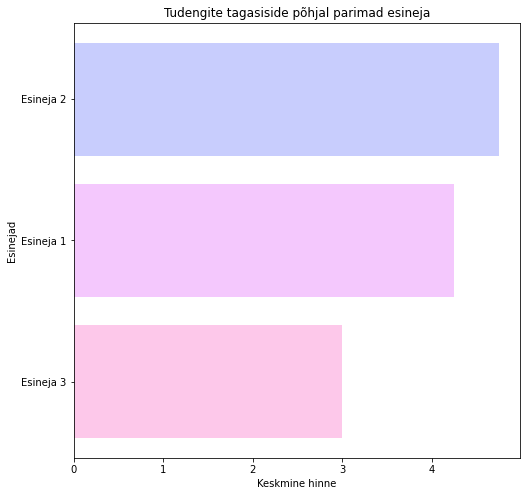

In [23]:
from matplotlib import pyplot as plt

data['colors'] = '#FDC8EA'
data.loc[data.Hinne>=4,'colors'] = '#F4C8FD'
data.loc[data.Hinne>=4.5,'colors'] = '#C8CDFD'

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.barh(data.Esineja, data.Hinne, color=data.colors)

plt.title("Tudengite tagasiside põhjal parimad esineja")
plt.ylabel("Esinejad")
plt.xlabel("Keskmine hinne")